# Lab 20 - Correlation, causation, and heat maps

The Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market#--:explore:outcomes-by-major).

The data used to be downloadable as an Excel file, but is not anymore.  We will use data from Feb. 2021 which is posted as a CSV file on Blackboard.

### 20.1 Loading and cleaning the data

We will be using a new data visualization library called [Seaborn](https://seaborn.pydata.org/#).  Import Seaborn and the other libraries so we can use them in our code.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Before creating the dataframe, look at the CSV file.  Do you notice anything that you will have to account for when reading in the data?  

To skip rows at the end of the CSV file, use the `skipfooter` parameter.  For example, to skip the last 5 rows of the CSV file, add the parameter `skipfooter = 5` to the `read_csv()` function.  Ignore any warnings that appear.

Load the labor market CSV file into a dataframe called `labor`:

In [15]:
labor = pd.read_csv("labor-market-Feb2021.csv", skiprows = 13, skipfooter = 3)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<details> <summary>Hint:</summary>
Add both the parameters `skipfooter = 3` and `skiprows = 13` to `read_csv()`.
</details>

Display your `labor` dataframe below to check it.

In [16]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,"40,000","65,000",20.8
1,Animal and Plant Sciences,2.6,58.6,"37,000","63,000",35.1
2,Environmental Studies,3.9,53.7,"39,000","65,000",30.5
3,Architecture,2.2,27.9,"50,000","76,000",41.0
4,Ethnic Studies,5.1,51.9,"40,000","67,000",48.6
5,Communications,3.3,54.0,"40,000","73,000",22.9
6,Journalism,4.0,40.8,"40,000","70,000",26.2
7,Mass Media,6.2,52.3,"38,000","65,000",19.2
8,Advertising and Public Relations,3.8,47.9,"45,000","71,000",19.4
9,Information Systems & Management,5.4,28.4,"50,000","80,000",25.2


We will want to use all the columns as numbers, but has `read_csv` interpreted them as numbers?  Type `labor.dtypes` below and run the code to see what *type* each column is.  `dtypes` is a property of the dataframe, not a function, so it doesn't have `()` at the end.  

In [17]:
labor.dtypes

Major                          object
Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career       object
Median Wage Mid-Career         object
Share with Graduate Degree    float64
dtype: object

Decimal numbers are stored as `float64`, so the `Unemployment Rate`, `Underemployment Rate`, and `Share with Graduate Degree` have been read in as numbers.  The `Median Wage Early Career` and `Median Wage Mid-Career` columns have type `object` which probably means a string.  These columns were read in as strings because they contains commas.

The following code will remove the commas and tell Pandas that these columns are `float`s as well.

In [18]:
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

Check that this code worked by displaying `labor` again:

In [19]:
labor.head()

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,40000.0,65000.0,20.8
1,Animal and Plant Sciences,2.6,58.6,37000.0,63000.0,35.1
2,Environmental Studies,3.9,53.7,39000.0,65000.0,30.5
3,Architecture,2.2,27.9,50000.0,76000.0,41.0
4,Ethnic Studies,5.1,51.9,40000.0,67000.0,48.6


Show the type for each column:

In [20]:
labor.dtypes

Major                          object
Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career      float64
Median Wage Mid-Career        float64
Share with Graduate Degree    float64
dtype: object

### 20.2 Correlation matrix

We can compute the correlation matrix with the code `labor.corr()`.  Try it below.

In [21]:
labor.corr()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Unemployment Rate,1.000000,0.301623,-0.138602,0.058341,-0.005350
Underemployment Rate,0.301623,1.000000,-0.593415,-0.394436,-0.222914
Median Wage Early Career,-0.138602,-0.593415,1.000000,0.878767,-0.068256
Median Wage Mid-Career,0.058341,-0.394436,0.878767,1.000000,-0.023248
Share with Graduate Degree,-0.005350,-0.222914,-0.068256,-0.023248,1.000000


Which pair of columns are the most correlated?  Which pair of columns are the least correlated?

### 20.3 Heat maps

We can visualize the correlation matrix with a heat map.  To do this, we need to save the correlation matrix in a variable (say `corr_matrix`) and then run the code `sns.heatmap(corr_matrix)`.  Try it below.

In [43]:
corr_matrix = labor.corr()
corr_matrix

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Unemployment Rate,1.000000,0.301623,-0.138602,0.058341,-0.005350
Underemployment Rate,0.301623,1.000000,-0.593415,-0.394436,-0.222914
Median Wage Early Career,-0.138602,-0.593415,1.000000,0.878767,-0.068256
Median Wage Mid-Career,0.058341,-0.394436,0.878767,1.000000,-0.023248
Share with Graduate Degree,-0.005350,-0.222914,-0.068256,-0.023248,1.000000


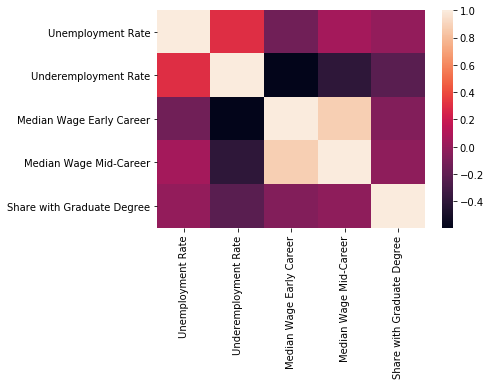

In [44]:
sns.heatmap(corr_matrix)

Find the pairs of columns that you thought were most correlated and least correlated above.  Do the colors for these pairs make sense?

Make a scatter plot of the two columns that are most correlated.  The code pattern for creating a scatter plot is `df.plot.scatter(x = "column name 1", y = "column name 2")`

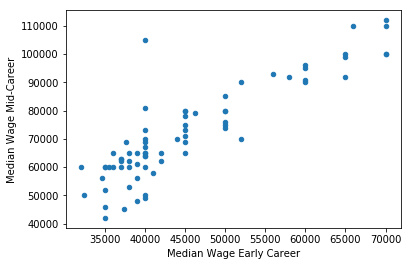

In [47]:
labor.plot.scatter(x="Median Wage Early Career", y ="Median Wage Mid-Career")

Does the relationship look linear (like a line)?

Now make a scatter plot of the two columns that were least correlated.

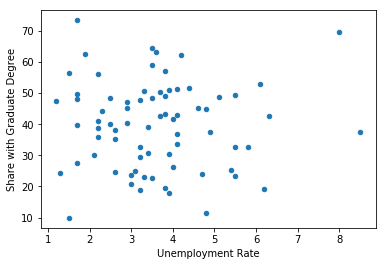

In [48]:
labor.plot.scatter(x = "Unemployment Rate", y = "Share with Graduate Degree")

Does this relationship look linear?

We can plot all possible scatter plots at once with the Seaborn command `sns.pairplot(labor)`.  Try it below.

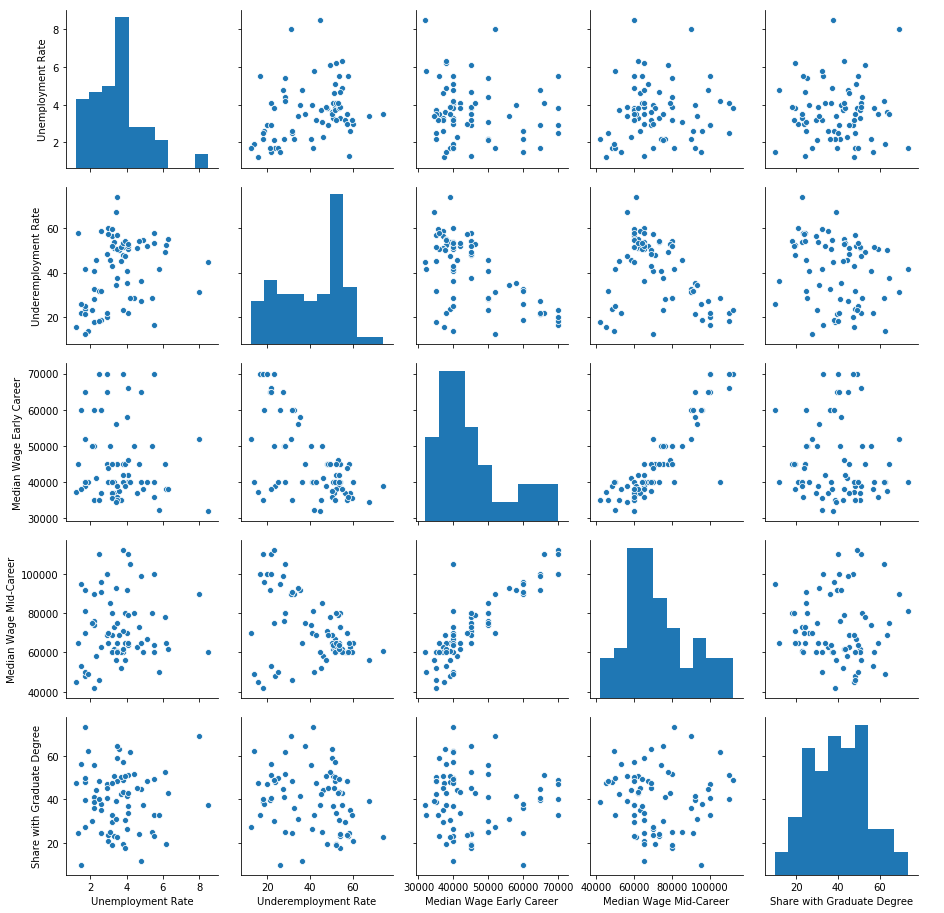

In [46]:
sns.pairplot(labor)

Can you spot the pairs of columns with negative correlation from the plots?  What plots are on the diagonal?

## 20.4 Another heat map: Traffic counts

To fully see the power of heat maps, we need a larger data set.  Download the dataset of traffic counts from Blackboard.

This dataset contains counts of the number of vehicles to pass different sections of road at different times of the day.  It was originally downloaded from NYC Open Data, but is no longer available.

Load the CSV file into a variable called `traffic`

In [49]:
traffic = pd.read_csv("Traffic_Volume_Counts__2012-2013_.csv")

Display your new dataframe.

In [50]:
traffic.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76


What are the columns?

Compute the correlation matrix.

In [51]:
traffic.corr()

,ID,Segment ID,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
ID,1.000000,0.916626,0.028730,0.007073,-0.002132,0.003625,0.044436,0.075011,0.086031,0.096517,...,0.085101,0.102839,0.111245,0.107070,0.092993,0.077167,0.058947,0.051751,0.048596,0.044084
Segment ID,0.916626,1.000000,0.003512,-0.018050,-0.026873,-0.020414,0.022112,0.065585,0.083007,0.099663,...,0.090525,0.108103,0.118381,0.112928,0.091662,0.070114,0.045249,0.034796,0.028072,0.022425
12:00-1:00 AM,0.028730,0.003512,1.000000,0.966880,0.902310,0.890023,0.883941,0.771560,0.684470,0.634842,...,0.829294,0.804431,0.779913,0.768661,0.793677,0.836548,0.877353,0.895306,0.904209,0.910723
1:00-2:00AM,0.007073,-0.018050,0.966880,1.000000,0.968983,0.956547,0.895611,0.707890,0.593198,0.545323,...,0.739451,0.710446,0.684244,0.672919,0.698742,0.744445,0.792908,0.816559,0.829360,0.843389
2:00-3:00AM,-0.002132,-0.026873,0.902310,0.968983,1.000000,0.986334,0.908709,0.659632,0.546624,0.512888,...,0.659838,0.631372,0.605626,0.594066,0.619198,0.662062,0.708932,0.731917,0.745383,0.758643
3:00-4:00AM,0.003625,-0.020414,0.890023,0.956547,0.986334,1.000000,0.935320,0.707142,0.578266,0.527626,...,0.669704,0.640240,0.615078,0.602701,0.625472,0.668434,0.713869,0.735767,0.749410,0.760287
4:00-5:00AM,0.044436,0.022112,0.883941,0.895611,0.908709,0.935320,1.000000,0.873280,0.765647,0.698690,...,0.773174,0.744267,0.720498,0.704174,0.720280,0.760035,0.797251,0.811937,0.821914,0.819898
5:00-6:00AM,0.075011,0.065585,0.771560,0.707890,0.659632,0.707142,0.873280,1.000000,0.937508,0.831632,...,0.840927,0.815656,0.795843,0.783502,0.797043,0.827093,0.842248,0.844890,0.845787,0.818539
6:00-7:00AM,0.086031,0.083007,0.684470,0.593198,0.546624,0.578266,0.765647,0.937508,1.000000,0.951168,...,0.842061,0.829904,0.818849,0.812789,0.824861,0.835220,0.830053,0.822790,0.813899,0.777308
7:00-8:00AM,0.096517,0.099663,0.634842,0.545323,0.512888,0.527626,0.698690,0.831632,0.951168,1.000000,...,0.824824,0.826528,0.822537,0.823497,0.829864,0.821369,0.803228,0.790612,0.777758,0.740615


<details> <summary>Answer:</summary>
<code>
traffic.corr()</code>
</details>

Our correlation matrix is fairly large, so it is hard to see patterns in it.  To visualize the correlation matrix, display it as a heatmap.

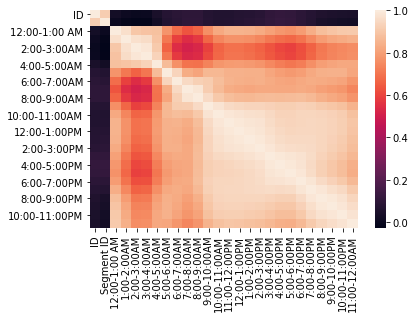

In [61]:
traffic_corr = traffic.corr()
sns.heatmap(traffic_corr)

<details> <summary>Answer:</summary>
<code>
traffic_corr_matrix = traffic.corr()
sns.heatmap(traffic_corr_matrix)</code>
</details>

What do you notice about the heatmap?  Which columns are similar?  Does this make sense?

### Challenges:
- Which pair of numeric columns in the taxi dataset are the most correlated?  Which pair of numeric columns in the taxi dataset are the least correlated?  Do these results make sense?
- Which pair of numeric columns in the Starbucks drink nuitrition information are the most correlated?  Which pair are the least correlated?  Do these results make sense?